In [1]:
# we'll need this for manipulating the csv file
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


Let's import the csv file from: https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv
it comes from this source: https://data.gov.ie/dataset/knock-airport-hourly-data/resource/d0aaf256-6854-4447-90bf-944b09105e40

In [2]:
# read in the data from the csv file, remember we must set URL equal to a string
url = "https://cli.fusio.net/cli/climate_data/webdata/hly4935.csv" 

# We now pass in the URL string to the read_csv function, and set our dataframe df equal to the data
#there are lots of superfluous columns (to us, so give them temporary heading before we remove them)
names = ["date","extra1","rain","extra2","temp","extra5","wetb","dewpt","vappr","rhum","msl","extra3","extra4","wdsp","wddir","ww","w","sun","vis","clht","clamt","cloud_amount"]
df = pd.read_csv(url, header=None,names=names,skiprows=24)
#just to get a view of that data
print(f"{df.head()}\n")


                date  extra1 rain  extra2  temp  extra5  wetb  dewpt  vappr  \
0  10-apr-1996 14:00       0  0.0       0  11.5       0   8.1    3.9    0.0   
1  31-jul-1996 08:00       0  0.0       0  11.5       0  11.1   10.7    0.0   
2  31-jul-1996 09:00       0  0.0       0  11.6       0  10.7    9.8    0.0   
3  31-jul-1996 10:00       0  0.0       0  12.9       0  11.3    9.8    0.0   
4  31-jul-1996 11:00       0  0.0       0  14.5       0  10.8    7.0    0.0   

   rhum  ... extra4  wdsp wddir  ww   w  sun    vis  clht clamt cloud_amount  
0     0  ...      0     0     0  25  81  0.0  35000    32     5          NaN  
1     0  ...      0     0     0  25  82  0.0  40000    45     5          NaN  
2     0  ...      0     0     0  80  81  0.0   8000    32     7          NaN  
3     0  ...      0     0     0  25  82  0.0  28000    35     6          NaN  
4     0  ...      0     0     0   2  11  0.0  40000    40     6          NaN  

[5 rows x 22 columns]



/tmp/ipykernel_35739/742227108.py:7: DtypeWarning: Columns (2,10,12,14,15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, header=None,names=names,skiprows=24)


In [3]:
headers = df.columns.tolist()
print(f"{headers}\n")

['date', 'extra1', 'rain', 'extra2', 'temp', 'extra5', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'extra3', 'extra4', 'wdsp', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'cloud_amount']



In [4]:
drop_col_list = ['extra1', 'rain', 'extra2', 'extra5', 'wetb', 'dewpt', 'vappr', 'rhum', 'msl', 'extra3', 'extra4', 'wdsp', 'wddir', 'ww', 'w', 'sun', 'vis', 'clht', 'clamt', 'cloud_amount']
df.drop(columns=drop_col_list, inplace=True)

headers = df.columns.tolist()
print(f"{headers}\n")
print(f"{df.head(20)}\n")
df.to_csv("knock_airport_data.csv")   

['date', 'temp']

                 date  temp
0   10-apr-1996 14:00  11.5
1   31-jul-1996 08:00  11.5
2   31-jul-1996 09:00  11.6
3   31-jul-1996 10:00  12.9
4   31-jul-1996 11:00  14.5
5   31-jul-1996 12:00  14.4
6   31-jul-1996 13:00  14.9
7   31-jul-1996 14:00  13.9
8   31-jul-1996 15:00  13.2
9   31-jul-1996 16:00  15.1
10  31-jul-1996 17:00  11.6
11  31-jul-1996 18:00  13.3
12  31-jul-1996 19:00  12.7
13  31-jul-1996 20:00  11.5
14  31-jul-1996 21:00  10.9
15  31-jul-1996 22:00  10.8
16  31-jul-1996 23:00   9.6
17  01-aug-1996 00:00   9.7
18  01-aug-1996 01:00   9.1
19  01-aug-1996 02:00  10.0



In [5]:
print(f"{df["date"]}\n")
#at the bottom of the listing it should confirm if this data is of time object or datetime.

0         10-apr-1996 14:00
1         31-jul-1996 08:00
2         31-jul-1996 09:00
3         31-jul-1996 10:00
4         31-jul-1996 11:00
                ...        
255685    30-sep-2025 20:00
255686    30-sep-2025 21:00
255687    30-sep-2025 22:00
255688    30-sep-2025 23:00
255689    01-oct-2025 00:00
Name: date, Length: 255690, dtype: object



In [6]:
# the date column is of type object which is no use to use, we must convert it to datetime
df["date"] = pd.to_datetime(df["date"])
# just to confirm it is of datetime
print(f"{df["date"]}\n")

/tmp/ipykernel_35739/760058839.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["date"] = pd.to_datetime(df["date"])


0        1996-04-10 14:00:00
1        1996-07-31 08:00:00
2        1996-07-31 09:00:00
3        1996-07-31 10:00:00
4        1996-07-31 11:00:00
                 ...        
255685   2025-09-30 20:00:00
255686   2025-09-30 21:00:00
255687   2025-09-30 22:00:00
255688   2025-09-30 23:00:00
255689   2025-10-01 00:00:00
Name: date, Length: 255690, dtype: datetime64[ns]



In [ ]:
# Let's restructure our dataframe so we can break out our date column which contains, the year, month, day and hour into their constituent parts
# based on https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# 
df["year"] = df["date"].dt.year
print(f"{(df["year"].head())}\n")

df["month"] = df["date"].dt.month
print(f"{(df["month"].head())}\n")

df["day"] = df["date"].dt.day
print(f"{(df["day"].head())}\n")

df['time'] = df["date"].dt.time
print(f"{(df["time"].head(6))}\n")


print(f"{(df.head(6))}\n")

0    1996
1    1996
2    1996
3    1996
4    1996
Name: year, dtype: int32

0    4
1    7
2    7
3    7
4    7
Name: month, dtype: int32

0    10
1    31
2    31
3    31
4    31
Name: day, dtype: int32

0    14:00:00
1    08:00:00
2    09:00:00
3    10:00:00
4    11:00:00
5    12:00:00
Name: time, dtype: object

                 date  temp  year  month  day      time
0 1996-04-10 14:00:00  11.5  1996      4   10  14:00:00
1 1996-07-31 08:00:00  11.5  1996      7   31  08:00:00
2 1996-07-31 09:00:00  11.6  1996      7   31  09:00:00
3 1996-07-31 10:00:00  12.9  1996      7   31  10:00:00
4 1996-07-31 11:00:00  14.5  1996      7   31  11:00:00
5 1996-07-31 12:00:00  14.4  1996      7   31  12:00:00



In [27]:
# now that i have my data in separate columns, 
# I can use the groupby function to first group the data by year, then the month, 
# then the day, and to calculate the mean termperature
# This method was inspired by Example 3 https://www.geeksforgeeks.org/pandas/python-pandas-dataframe-groupby/ 

aggregated_data = df.groupby(["year", "month", "day"]).agg(
    avg_mean_temp =('temp', 'mean')
    
)


# now to check my data
print(f"{aggregated_data.head(20)}")
aggregated_data.to_csv("mean_temps.csv")   

                avg_mean_temp
year month day               
1996 4     10       11.500000
     7     31       12.650000
     8     1        11.666667
           2        12.504167
           3        14.266667
           4        13.987500
           5        11.520833
           6        11.108333
           7        12.633333
           8        13.566667
           9        12.945833
           10       12.850000
           11       13.562500
           12       13.216667
           13       13.929167
           14       14.329167
           15       14.658333
           16       15.508333
           17       15.716667
           18       16.116667


In [28]:
names = ["year","month", "day","avg_mean_temp"]
df = pd.read_csv("mean_temps.csv", header=None,names=names,skiprows=2)


In [29]:
#headers = aggregated_data.columns.tolist()
print(f"{df}\n")

       year  month  day  avg_mean_temp
0      1996      7   31      12.650000
1      1996      8    1      11.666667
2      1996      8    2      12.504167
3      1996      8    3      14.266667
4      1996      8    4      13.987500
...     ...    ...  ...            ...
10650  2025      9   27      10.866667
10651  2025      9   28       9.650000
10652  2025      9   29      11.416667
10653  2025      9   30      13.554167
10654  2025     10    1      14.000000

[10655 rows x 4 columns]



In [32]:
#Method 2: Concatenating as strings and then converting 
df['date_col_2'] = pd.to_datetime(df['year'].astype(str) + '-' + 
                                  df['month'].astype(str) + '-' + 
                                  df['day'].astype(str))
print("\nDataFrame with new date columns:")
print(df)


DataFrame with new date columns:
       year  month  day  avg_mean_temp date_col_2
0      1996      7   31      12.650000 1996-07-31
1      1996      8    1      11.666667 1996-08-01
2      1996      8    2      12.504167 1996-08-02
3      1996      8    3      14.266667 1996-08-03
4      1996      8    4      13.987500 1996-08-04
...     ...    ...  ...            ...        ...
10650  2025      9   27      10.866667 2025-09-27
10651  2025      9   28       9.650000 2025-09-28
10652  2025      9   29      11.416667 2025-09-29
10653  2025      9   30      13.554167 2025-09-30
10654  2025     10    1      14.000000 2025-10-01

[10655 rows x 5 columns]


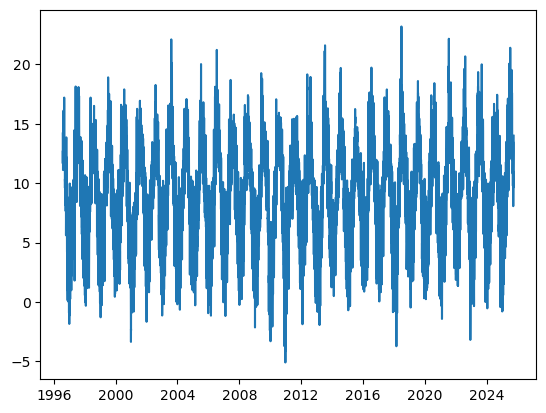

In [33]:
x = np.array(df["date_col_2"])
y = np.array(df["avg_mean_temp"])

plt.plot(x,y)
plt.show()


In [10]:
#print(f"{df[year].type()}")
#df['year'] = pd.to_datetime(df['year'])
#df['year'] = df['year'].astype('datetime64[ns]')
#print(f"{(df["year"].head())}\n")

#df['month'] = pd.to_datetime(df['month'])
#print(f"{(df["month"].head())}\n")

#df['day'] = pd.to_datetime(df['day'])
#print(f"{(df["day"].head())}\n")

#print(f"{(df.head(6))}\n")

In [11]:
# Calculate the mean temperature
mean_temp=np.average(df["temp"])
print(f"The average mean temperature is: {round(mean_temp,2)} degrees celsius.")

The average mean temperature is: 8.8 degrees celsius.
